In [1]:
import sys
import pandas as pd
import numpy as np
from scipy.stats import sem
import ipywidgets
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
import jup_config
import data_ingestion, plot, analysis
data = data_ingestion.mat_data

Consider Only few Blocks

In [10]:
BLOCKS = np.array([1,2,3])

In [3]:
def comp_sum(vals, orient ,t1, t2):
    sig = analysis.Signal(values=vals)
    if sig.isnull():
        return np.nan
    comp = analysis.Component(orient,t1,t2,sig)
    return comp.sum()

def comp_auc(vals, orient ,t1, t2):
    sig = analysis.Signal(values=vals)
    if sig.isnull():
        return np.nan
    comp = analysis.Component(orient,t1,t2,sig)
    return comp.auc()

def comp_score(vals, orient ,t1, t2, score, **kwargs):
    sig = analysis.Signal(values=vals)
    if sig.isnull():
        return np.nan
    comp = analysis.Component(orient,t1,t2,sig)
    return getattr(comp, method)(**kwargs)

In [4]:
data['N1_sum'] = np.apply_along_axis(lambda sig: comp_sum(sig, "N",70,130),1,data['s2'])
data['P2_sum'] = np.apply_along_axis(lambda sig: comp_sum(sig, "P",150,250),1,data['s2'])
data['P3_sum'] = np.apply_along_axis(lambda sig: comp_sum(sig, "P",150,250),1,data['s2'])

In [36]:
data['N1_auc'] = np.apply_along_axis(lambda sig: comp_auc(sig, "N",70,130),1,data['s2'])
data['P2_auc'] = np.apply_along_axis(lambda sig: comp_auc(sig, "P",150,250),1,data['s2'])
data['P3_auc'] = np.apply_along_axis(lambda sig: comp_auc(sig, "P",150,250),1,data['s2'])

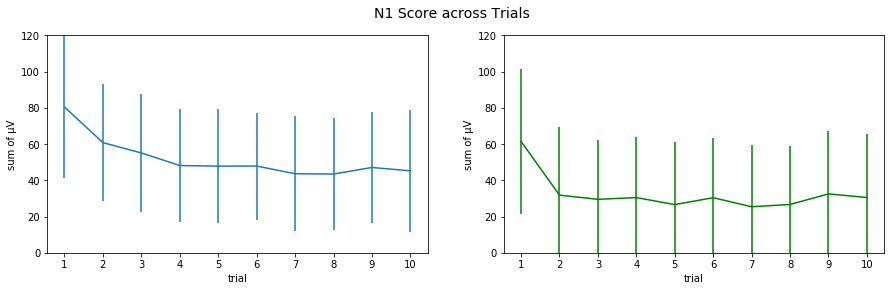

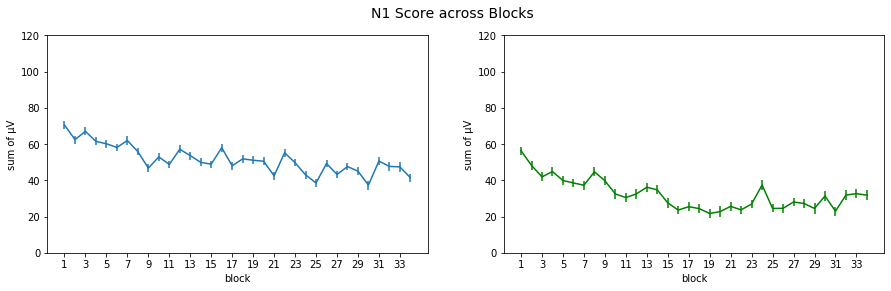

In [13]:
cont = data['N1_sum'][data['group']=="Control"]
asd = data['N1_sum'][data['group']=="ASD"]
# np.nanmean(cont, axis=(0,2))
# np.nanmean(asd, axis=(0,2))

fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.suptitle("N1 Score across Trials", size=14)
plt.setp(ax, xticks=np.arange(10), xticklabels=np.arange(10)+1, xlabel="trial", 
         ylabel="sum of "+plot.MICROVOLT_STR, ylim=(0,120))
ax[0].errorbar(np.arange(10),-np.nanmean(cont, axis=(0,2)),
               yerr=np.nanstd(cont, axis=(0,2))/2)
ax[1].errorbar(np.arange(10),-np.nanmean(asd, axis=(0,2)),
               yerr=np.nanstd(asd, axis=(0,2))/2, c="green")

# ax[0].set_ylim(0,120)
# ax[1].set_ylim(0,120)

plt.show()

fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.suptitle("N1 Score across Blocks", size=14)
plt.setp(ax, xticks=np.arange(34, step=2), xticklabels=np.arange(34, step=2)+1, xlabel="block", 
         ylabel="sum of "+plot.MICROVOLT_STR, ylim=(0,120))

ax[0].errorbar(np.arange(34),-np.nanmean(cont, axis=(0,1)),
               yerr=analysis.nansem(cont, axis=(0,1))/2)
ax[1].errorbar(np.arange(34),-np.nanmean(asd, axis=(0,1)),
               yerr=analysis.nansem(asd, axis=(0,1))/2, c="green")

ax[0].set_ylim(0,120)
ax[1].set_ylim(0,120)

plt.show()
# data['delay_to_peak'][11,:,]
# plt.plot(np.arange(10),np.nanmean(data['delay_to_peak'], axis=(0,2)))

In [ ]:
data['']

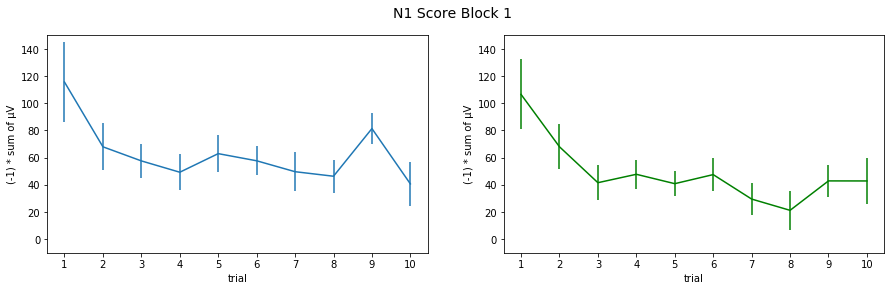

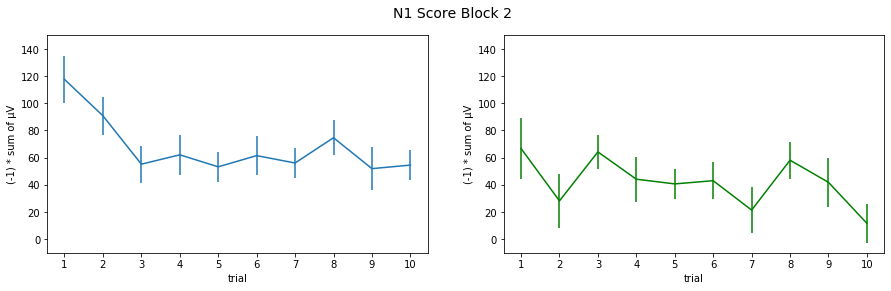

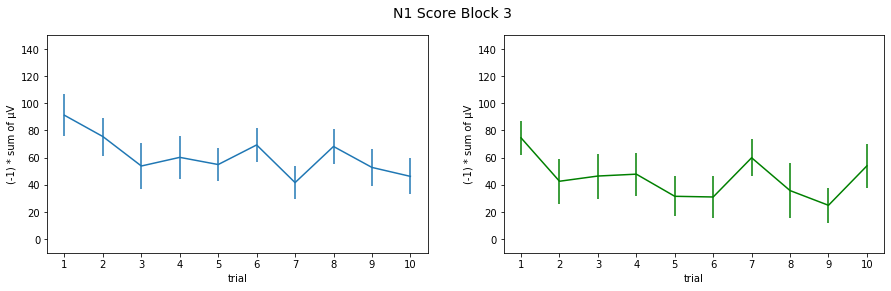

In [17]:
from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages("N1.pdf")

cont = data['N1_sum'][data['group']=="Control"]
asd = data['N1_sum'][data['group']=="ASD"]
for bl in BLOCKS:
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    fig.suptitle(f"N1 Score Block {bl}", size=14)
    cont_err, asd_err = analysis.nansem(cont[:,:,bl-1], axis=0), analysis.nansem(asd[:,:,bl], axis=0)
    ax[0].errorbar(np.arange(10),-np.nanmean(cont[:,:,bl], axis=0),
                   yerr=analysis.nansem(cont[:,:,bl-1], axis=0))
    ax[1].errorbar(np.arange(10),-np.nanmean(asd[:,:,bl], axis=0),
                   yerr=analysis.nansem(asd[:,:,bl-1], axis=0), c="green")
    
    plt.setp(ax, xticks=np.arange(10), xticklabels=np.arange(10)+1, xlabel="trial", 
             ylabel="(-1) * sum of "+plot.MICROVOLT_STR, 
             ylim=(-10,150))
    
#     pp.savefig(fig, dpi = 300, transparent = True)

    plt.show()

# pp.close()

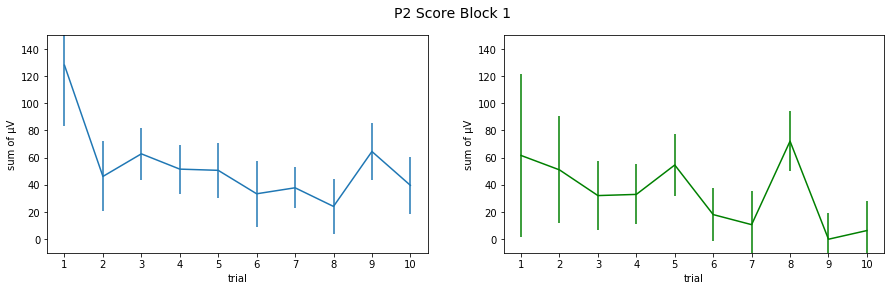

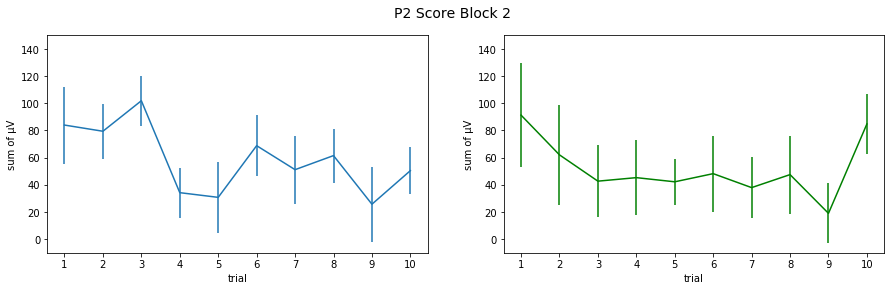

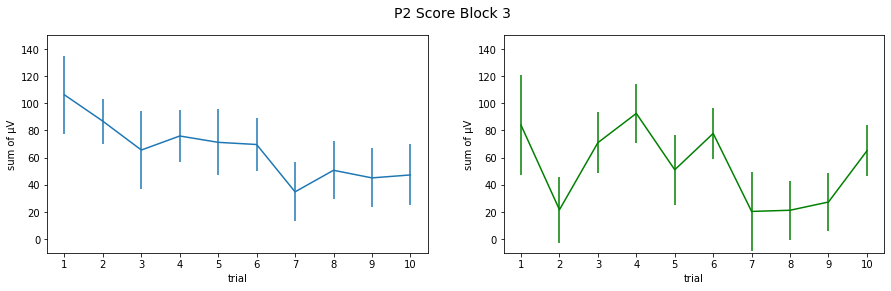

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("P2.pdf")

cont = data['P2_sum'][data['group']=="Control"]
asd = data['P2_sum'][data['group']=="ASD"]
for bl in BLOCKS:
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    fig.suptitle(f"P2 Score Block {bl}", size=14)
    cont_err, asd_err = analysis.nansem(cont[:,:,bl-1], axis=0), analysis.nansem(asd[:,:,bl], axis=0)
    ax[0].errorbar(np.arange(10),np.nanmean(cont[:,:,bl], axis=0),
                   yerr=analysis.nansem(cont[:,:,bl-1], axis=0))
    ax[1].errorbar(np.arange(10),np.nanmean(asd[:,:,bl], axis=0),
                   yerr=analysis.nansem(asd[:,:,bl-1], axis=0), c="green")
    
    plt.setp(ax, xticks=np.arange(10), xticklabels=np.arange(10)+1, xlabel="trial", 
             ylabel="sum of "+plot.MICROVOLT_STR, 
             ylim=(-10,150))
    
    pp.savefig(fig, dpi = 300, transparent = True)

    plt.show()

# pp.close()

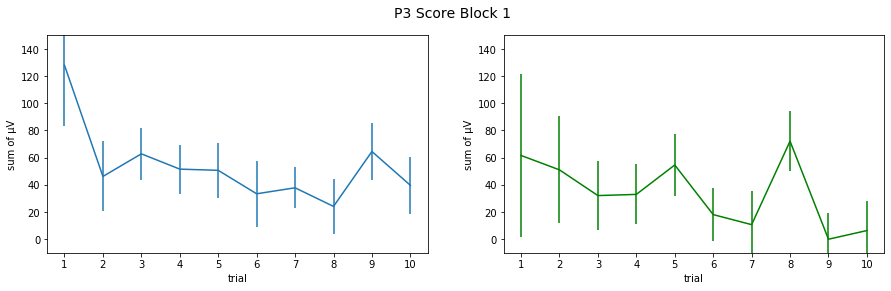

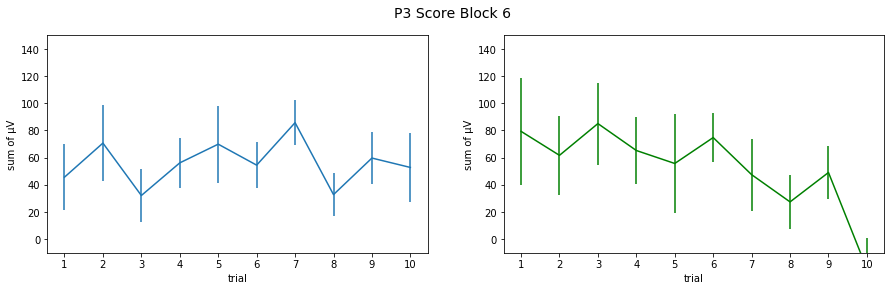

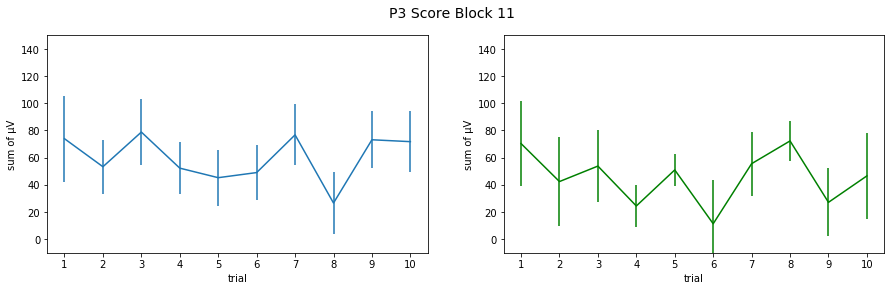

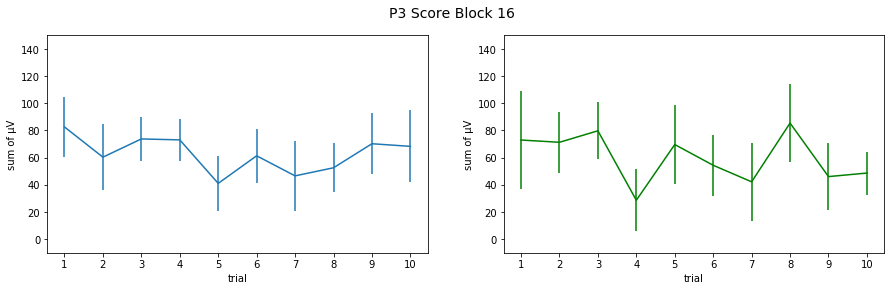

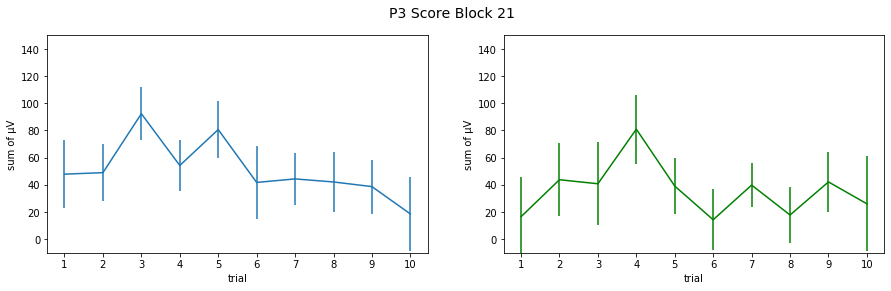

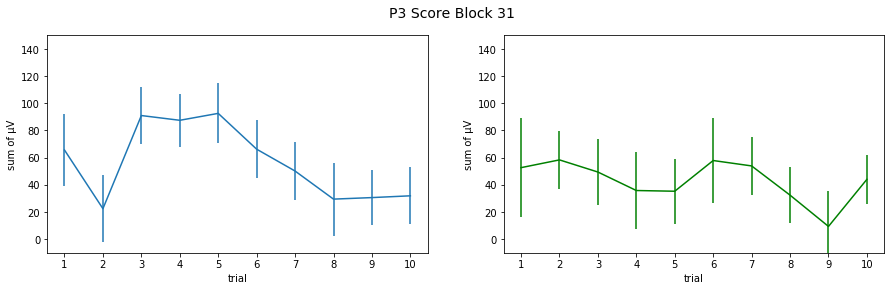

In [34]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("P3.pdf")

cont = data['P3_sum'][data['group']=="Control"]
asd = data['P3_sum'][data['group']=="ASD"]
for bl in BLOCKS:
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    fig.suptitle(f"P3 Score Block {bl}", size=14)
    cont_err, asd_err = analysis.nansem(cont[:,:,bl-1], axis=0), analysis.nansem(asd[:,:,bl], axis=0)
    ax[0].errorbar(np.arange(10),np.nanmean(cont[:,:,bl], axis=0),
                   yerr=analysis.nansem(cont[:,:,bl-1], axis=0))
    ax[1].errorbar(np.arange(10),np.nanmean(asd[:,:,bl], axis=0),
                   yerr=analysis.nansem(asd[:,:,bl-1], axis=0), c="green")
    
    plt.setp(ax, xticks=np.arange(10), xticklabels=np.arange(10)+1, xlabel="trial", 
             ylabel="sum of "+plot.MICROVOLT_STR, 
             ylim=(-10,150))
    
    pp.savefig(fig, dpi = 300, transparent = True)

    plt.show()

pp.close()

In [42]:
for_lim = np.concatenate((analysis.nansem(asd, axis=0), analysis.nansem(cont, axis=0)))
np.min(for_lim), np.max(for_lim)

(-2389.166015625, 3093.20703125)

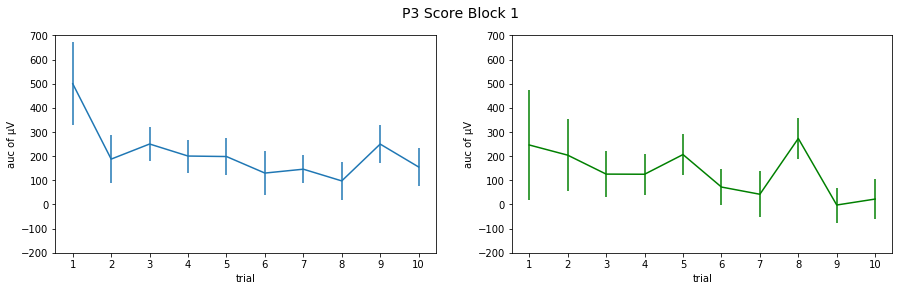

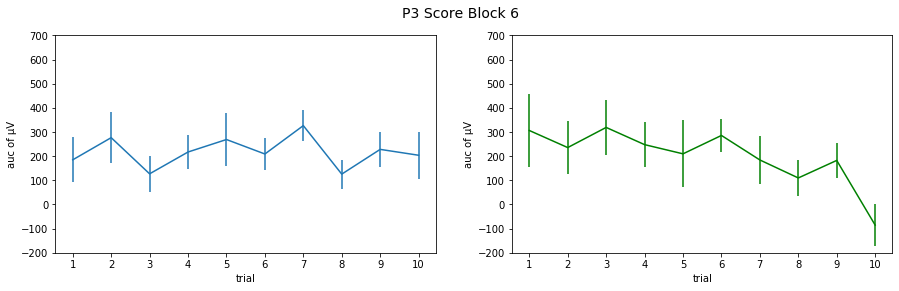

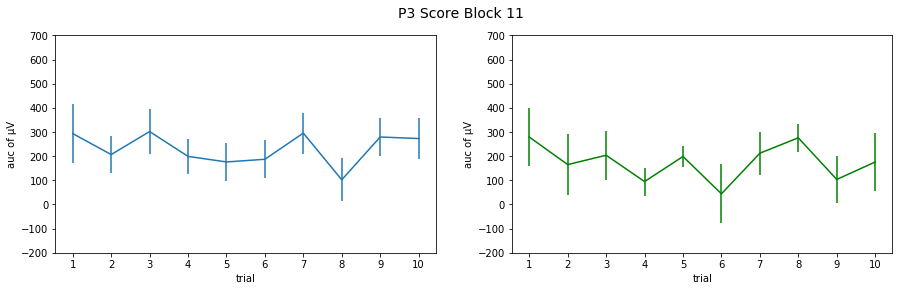

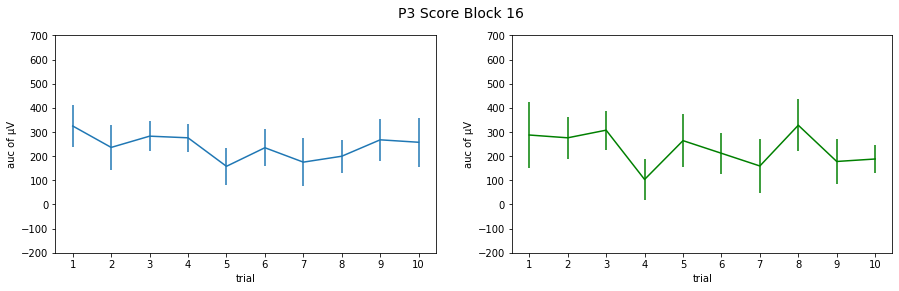

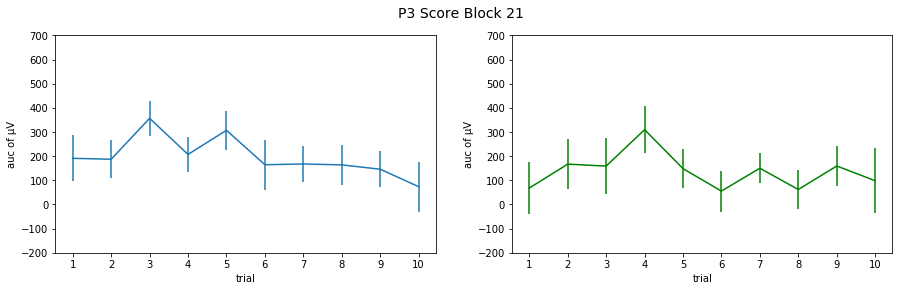

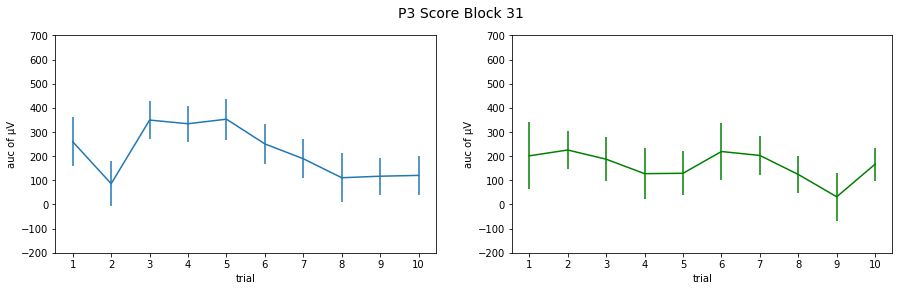

In [46]:
# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages("P3_auc.pdf")

# cont = data['P3_auc'][data['group']=="Control"]
# asd = data['P3_auc'][data['group']=="ASD"]
# for bl in BLOCKS:
#     fig, ax = plt.subplots(1,2, figsize=(15,4))
#     fig.suptitle(f"P3 Score Block {bl}", size=14)
#     cont_err, asd_err = analysis.nansem(cont[:,:,bl-1], axis=0), analysis.nansem(asd[:,:,bl], axis=0)
#     ax[0].errorbar(np.arange(10),np.nanmean(cont[:,:,bl], axis=0),
#                    yerr=analysis.nansem(cont[:,:,bl-1], axis=0))
#     ax[1].errorbar(np.arange(10),np.nanmean(asd[:,:,bl], axis=0),
#                    yerr=analysis.nansem(asd[:,:,bl-1], axis=0), c="green")
    
#     plt.setp(ax, xticks=np.arange(10), xticklabels=np.arange(10)+1, xlabel="trial", 
#              ylabel="auc of "+plot.MICROVOLT_STR, 
#              ylim=(-200,700))

#     pp.savefig(fig, dpi = 300, transparent = True)

#     plt.show()

# pp.close()